In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Liste des symboles des principales banques européennes
european_banks = [
    'BNP.PA',   # BNP Paribas
    'GLE.PA',   # Société Générale 
    'ACA.PA',   # Crédit Agricole 
    'HSBA.L',   # HSBC (UK)
    'BARC.L',   # Barclays (UK)
    'DBK.DE',   # Deutsche Bank (Germany)
    'UBSG.SW',  # UBS Group (Switzerland)
    'INGA.AS',  # ING Group (Netherlands)
    'ISP.MI',   # Intesa Sanpaolo (Italy)
    'SAN.MC',   # Banco Santander (Spain)
    'BBVA.MC'   # BBVA (Spain)
]

# à partir de 2013
start_date = '2013-01-01'
end_date = '2024-11-07'

# Télécharger les données pour chaque action
data = {}
for ticker in european_banks:
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    data[ticker] = stock_data

# Combiner les données de toutes les actions en un seul DataFrame
combined_data = pd.concat(data, axis=1)

# Compter les valeurs manquantes au début
first_non_nan_index = combined_data.apply(lambda col: col.first_valid_index())
num_missing_start = combined_data.index.get_loc(first_non_nan_index.min())

# 1. Utiliser l'interpolation pour remplir les valeurs manquantes intermédiaires
combined_data = combined_data.interpolate(method='linear')

# 2. Utiliser forward fill pour les valeurs manquantes restantes au début
combined_data = combined_data.ffill()

# 3. Utiliser backward fill pour les valeurs manquantes restantes à la fin
combined_data = combined_data.bfill()

# Vérification finale : S'assurer qu'il ne reste plus de valeurs manquantes
missing_values = combined_data.isnull().sum().sum()
print("Nombre total de valeurs manquantes après traitement:", missing_values)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Nombre total de valeurs manquantes après traitement: 0
Nombre total de valeurs manquantes après traitement: 0


In [5]:
# Initialiser un DataFrame pour stocker uniquement les log returns et le volume
simplified_data = pd.DataFrame(index=combined_data.index)

# Calculer le log return et sélectionner le volume pour chaque banque
for ticker in european_banks:
    # Calcul du log return à partir des prix Adj Close
    simplified_data[(ticker, 'Log Return')] = np.log(combined_data[(ticker, 'Adj Close')] / combined_data[(ticker, 'Adj Close')].shift(1))
    
    # Ajouter le volume journalier
    simplified_data[(ticker, 'Volume')] = combined_data[(ticker, 'Volume')]

# Supprimer les lignes avec des valeurs NaN résultant du calcul du log return
simplified_data = simplified_data.dropna()

# Vérifier le DataFrame final
print(simplified_data.head())
print("Shape of simplified_data:", simplified_data.shape)

            (BNP.PA, Log Return)  (BNP.PA, Volume)  (GLE.PA, Log Return)  \
Date                                                                       
2013-01-03              0.000000         1719620.0             -0.009255   
2013-01-04             -0.001689         1969483.0             -0.008318   
2013-01-07              0.018417         4186011.0              0.026910   
2013-01-08              0.010671         4068024.0              0.031204   
2013-01-09             -0.001204         4651803.0              0.033687   

            (GLE.PA, Volume)  (ACA.PA, Log Return)  (ACA.PA, Volume)  \
Date                                                                   
2013-01-03         3046422.0             -0.000315         4799499.0   
2013-01-04         3592365.0              0.000787         3418203.0   
2013-01-07         5770778.0              0.034803        14279715.0   
2013-01-08         6491202.0              0.008025        15733262.0   
2013-01-09         5842535.0       

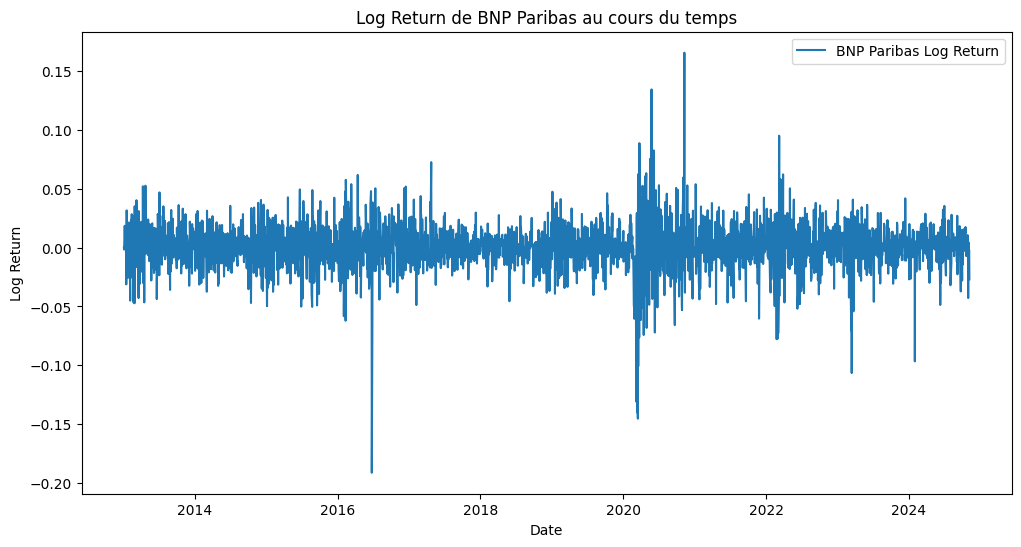

In [6]:
# Sélectionner la colonne 'Log Return' pour BNP Paribas
bnp_log_return = simplified_data[('BNP.PA', 'Log Return')]

# Afficher le log return au cours du temps
plt.figure(figsize=(12, 6))
plt.plot(bnp_log_return.index, bnp_log_return, label='BNP Paribas Log Return')
plt.xlabel('Date')
plt.ylabel('Log Return')
plt.title('Log Return de BNP Paribas au cours du temps')
plt.legend()
plt.show()
